Attempts to reproduce results in 10.1016/j.chaos.2020.110381.

In [1]:
from copy import deepcopy
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import stats
from tqdm.notebook import tqdm

from sde_models import Adak2020, Adak2020Fitted
import sde

store_ssr_data = True
load_ssr_data = False

fig_kwargs = dict(
    layout='compressed',
    figsize=(12.0, 3.0)
)
plot_all_kwargs = dict(
    color='gray',
    alpha=0.1
)
fig_compare_kwargs = dict(
    layout='compressed', 
    figsize=(8.0, 4.0)
)

t_fin = 228.0
dt = 1.0
sample_size = 1000
tested_sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
confidence = 0.95

results_dir = os.path.join('results', Adak2020.name)

def initial_values(**kwargs):
    result = {'S': 47431256.0,
              'L': 0.0,
              'I': 0.0,
              'R': 0.0,
              'D': 0.0}
    result.update(kwargs)
    result['N'] = sum([result[k] for k in ['S', 'L', 'I', 'R']])
    return result

In [2]:
num_steps = int(t_fin / dt)
if sde.get_pool() is None:
    sde.start_pool()

Trying to reproduce left-hand column of Figure 4. Initial conditions were not given and so approximated here. 

Decay of quasi-deterministic solution is too slow. 

Stochastic solution is wildly different. 

  0%|          | 0/2 [00:00<?, ?it/s]

sig=1e-12:   0%|          | 0/4 [00:00<?, ?it/s]

sig=0.4:   0%|          | 0/4 [00:00<?, ?it/s]

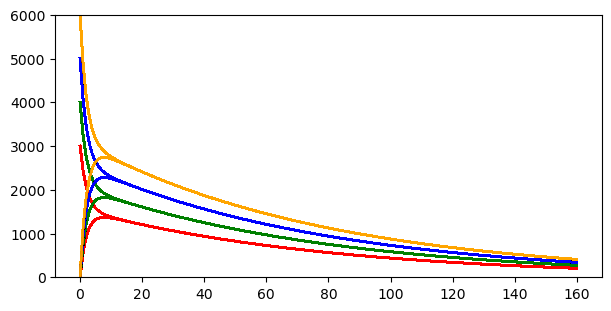

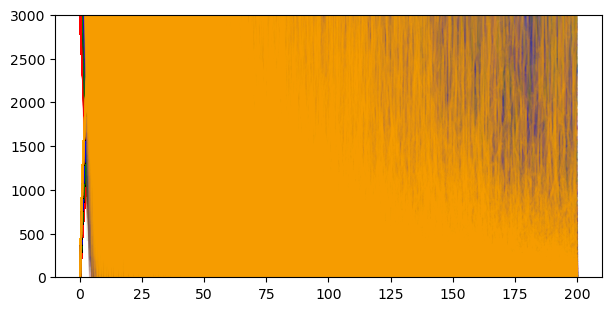

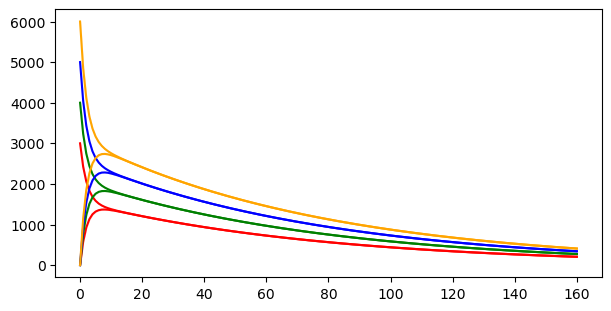

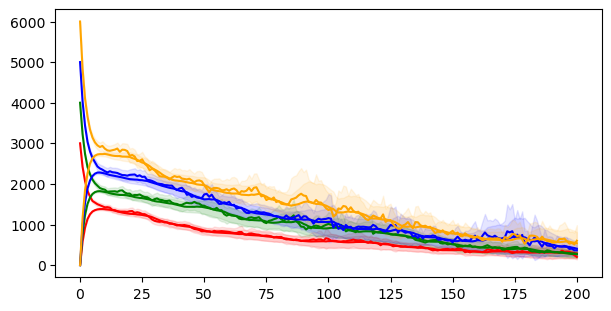

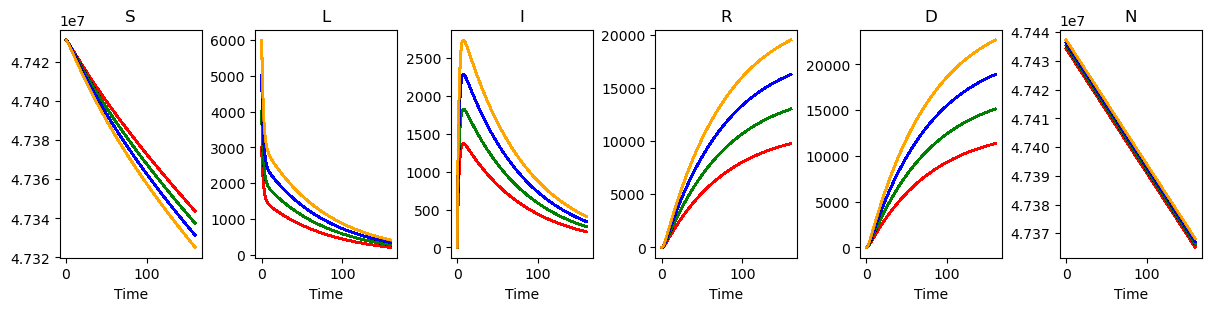

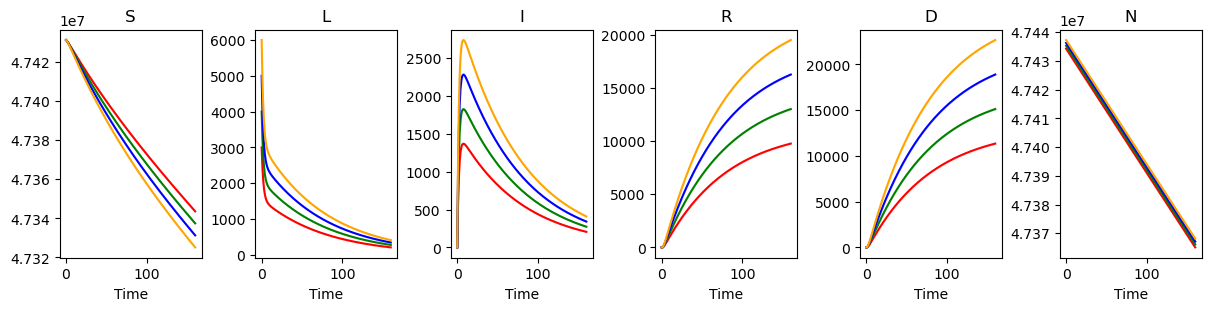

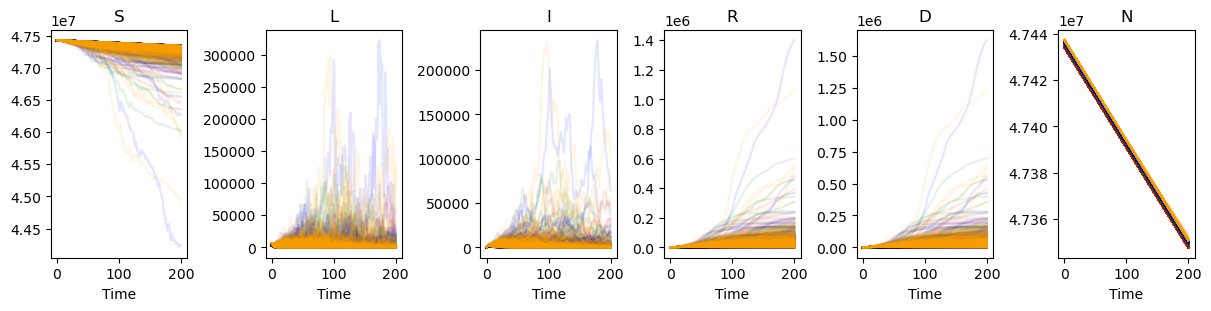

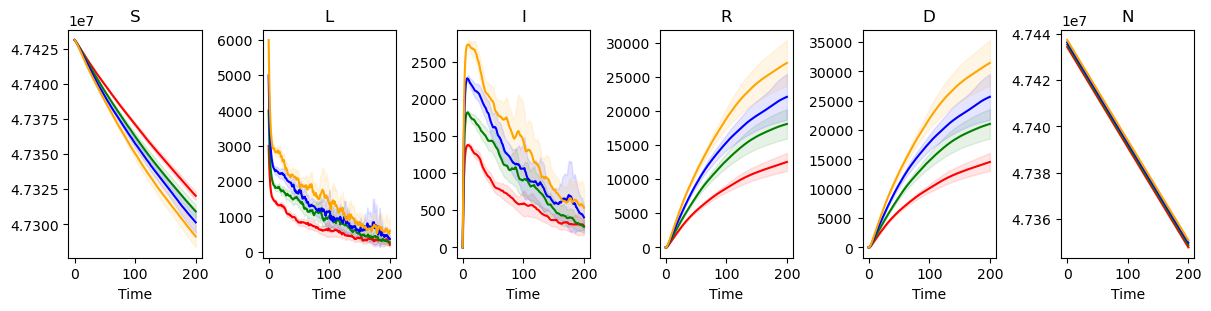

In [3]:
init_pops_fig_4 = [3E3, 4E3, 5E3, 6E3]
colors = ['red', 'green', 'blue', 'orange']
t_fin_test = [160.0, 200.0]
sigs = [1E-12, 0.4]
sig_stoch = sigs[-1]
fig_axs_paper = [plt.subplots(1, 1, figsize=(6.0, 3.0), layout='compressed') for _ in sigs]
fig_axs_paper_stat = [plt.subplots(1, 1, figsize=(6.0, 3.0), layout='compressed') for _ in sigs]
fig_axs_paper_ylims = [6E3, 3E3]
initial_values_fig_4 = {}
parameters_fig_4 = {}
num_steps_fig_4 = int(t_fin_test[-1] / dt)
model_fig_4 = Adak2020()
for j, sig in tqdm(enumerate(sigs), total=len(sigs), leave=False):
    fig_axs = None
    fig_axs_stat = None
    num_steps_test = int(t_fin_test[j] / dt)
    for i, pop in tqdm(enumerate(init_pops_fig_4), total=len(init_pops_fig_4), desc=f'sig={sig}', leave=False):
        initial_values_test = initial_values(L=pop)
        parameters_test = {'lam': 0.18, 
                           'sigma': sig}
        result = sde.execute_sample(sample_size, model_fig_4, num_steps_test, dt, initial_values=initial_values_test, parameters=parameters_test)
        plot_all_kwargs_copy = deepcopy(plot_all_kwargs)
        plot_all_kwargs_copy['color'] = colors[i]
        plot_all_kwargs_copy['alpha'] = 0.1
        fig_axs = result.plot(fig_axs=fig_axs, fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs_copy)

        fig_axs_stat = result.plot_ci(0.95, fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs_copy, fig_axs=fig_axs_stat)
        plot_all_kwargs_mean = deepcopy(plot_all_kwargs_copy)
        plot_all_kwargs_mean['alpha'] = 1.0
        result.plot_mean(fig_axs=fig_axs_stat, plot_all_kwargs=plot_all_kwargs_mean)

        res_mean = result.mean
        res_ci_inc = result.ci_inc(0.95)
        for name in ['L', 'I']:
            idx = result.index(name)
            for n in range(len(result)):
                fig_axs_paper[j][1].plot(result.time, result.data[n][idx, :], alpha=0.1, color=colors[i])
                fig_axs_paper[j][1].set_ylim(0, fig_axs_paper_ylims[j])
            fig_axs_paper_stat[j][1].fill_between(result.time, 
                                                  res_mean[idx, :] - res_ci_inc[idx, :], 
                                                  res_mean[idx, :] + res_ci_inc[idx, :], 
                                                  alpha=0.1, color=colors[i])
            fig_axs_paper_stat[j][1].plot(result.time, res_mean[idx, :], color=colors[i])

        if not load_ssr_data:
            
            if sig == sig_stoch:
                initial_values_fig_4[pop] = deepcopy(initial_values_test)
                parameters_fig_4[pop] = deepcopy(parameters_test)

Trying to reproduce Figure 6. 

Attempt failed. Apparently different parameters were used that were not reported. 

  0%|          | 0/2 [00:00<?, ?it/s]

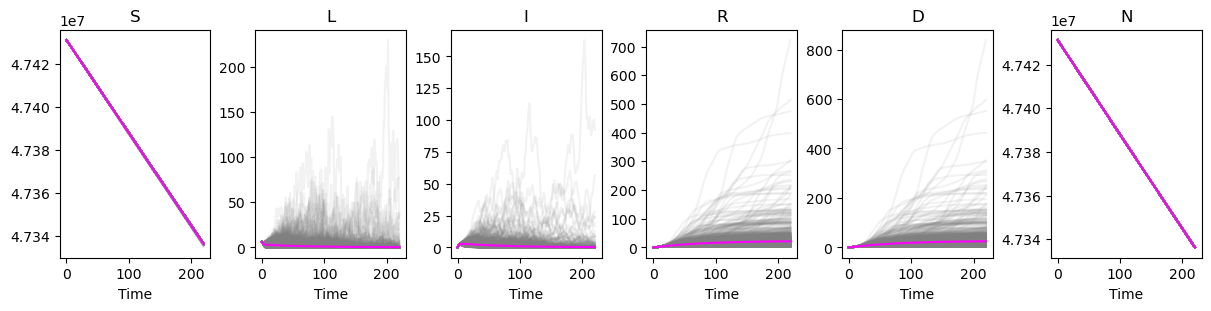

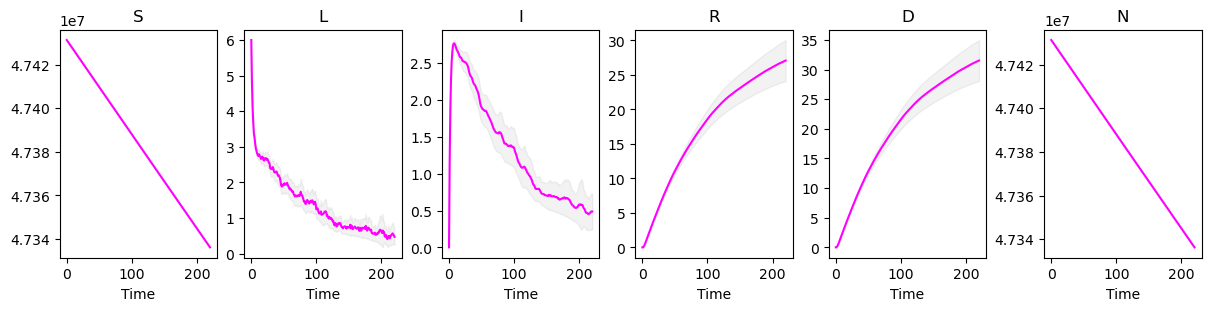

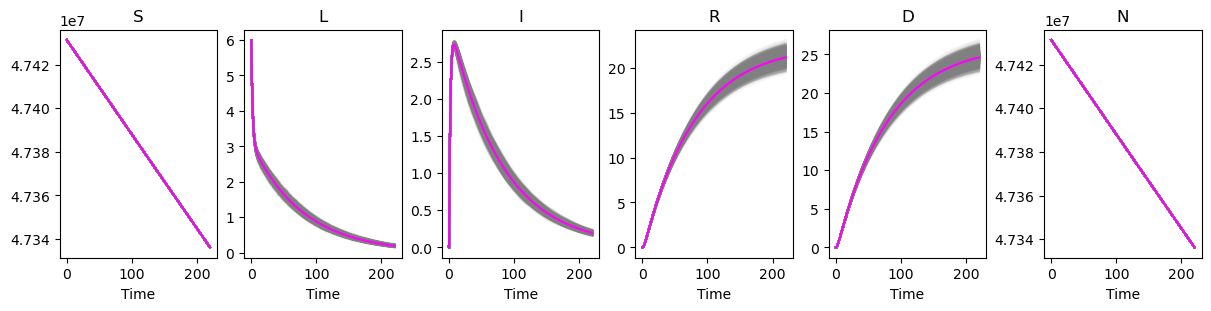

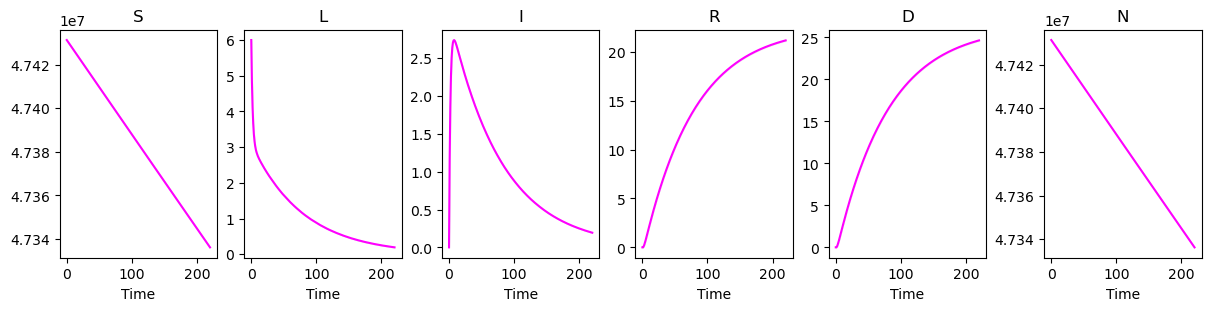

In [4]:
colors_ode = 'magenta'
sigs_fig_6 = [0.4, 0.01]
initial_values_fig_6 = {}
parameters_fig_6 = {}
model_fig_6 = Adak2020()
num_steps_fig_6 = int(220 / dt)
for j, sig in tqdm(enumerate(sigs_fig_6), total=len(sigs_fig_6), leave=False):
    fig_axs = None
    fig_axs_stat = None

    plot_all_kwargs_copy = deepcopy(plot_all_kwargs)
    plot_all_kwargs_copy['color'] = colors_ode
    plot_all_kwargs_copy['alpha'] = 1.0

    initial_values_test = initial_values(L=6.0)
    parameters_test = {'lam': 0.18, 
                       'sigma': sig}
    result = sde.execute_sample(sample_size, model_fig_6, num_steps_fig_6, dt, initial_values=initial_values_test, parameters=parameters_test)
    fig_axs = result.plot(fig_axs=fig_axs, fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)
    
    fig_axs_stat = result.plot_ci(0.95, fig_axs=fig_axs_stat, fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)
    fig_axs_stat = result.plot_mean(fig_axs=fig_axs_stat, plot_all_kwargs=plot_all_kwargs_copy)

    if not load_ssr_data:

        initial_values_fig_6[sig] = deepcopy(initial_values_test)
        parameters_fig_6[sig] = deepcopy(parameters_test)

    parameters_test['sigma'] = 1E-12
    result = sde.SDESimulation(model_fig_6, num_steps_fig_6, dt, initial_values=initial_values_test, parameters=parameters_test).run()
    fig_axs = result.plot(fig_axs=fig_axs, fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs_copy)

Trying to reproduce Figure 1.

Attempt failed. Average cumulative results are much lower than those reported.

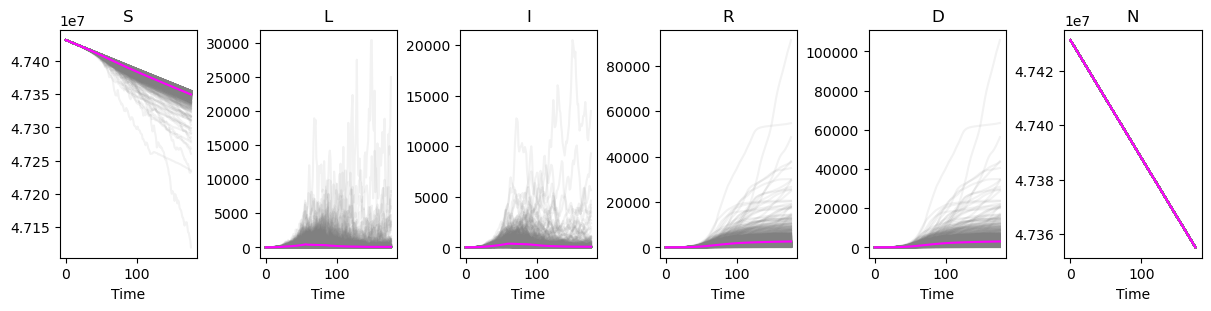

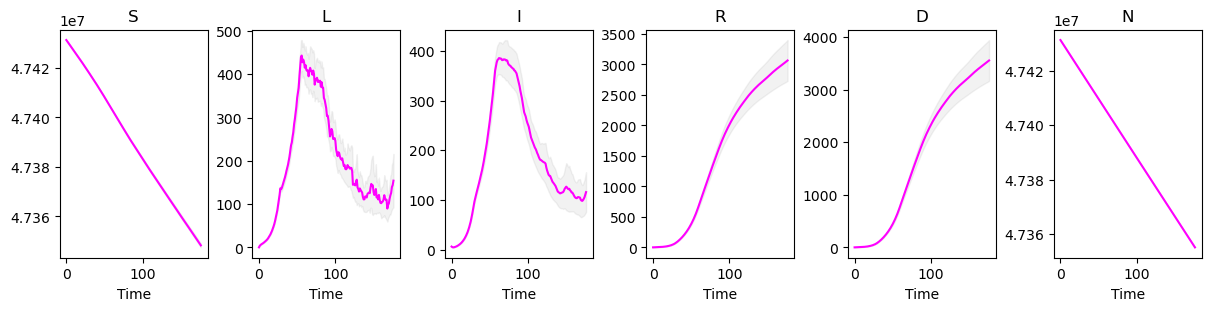

In [5]:
colors_ode = 'magenta'

fig_axs = None
num_steps_fig_1 = int(8 * 22 / dt)
model_fig_1 = Adak2020Fitted()

plot_all_kwargs_copy = deepcopy(plot_all_kwargs)
plot_all_kwargs_copy['color'] = colors_ode
plot_all_kwargs_copy['alpha'] = 1.0

initial_values_fig_1 = initial_values(I=6.0)
parameters_fig_1 = {}
results_fig_1 = sde.execute_sample(sample_size, model_fig_1, num_steps_fig_1, dt, initial_values=initial_values_fig_1, parameters=parameters_fig_1)
fig_axs = results_fig_1.plot(fig_axs=fig_axs, fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)

fig_axs_stat = results_fig_1.plot_ci(0.95, fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)
results_fig_1.plot_mean(fig_axs=fig_axs_stat, plot_all_kwargs=plot_all_kwargs_copy)

parameters_fig_1_det = deepcopy(parameters_fig_1)
parameters_fig_1_det['sigma'] = 1E-12
result_ode = sde.SDESimulation(model_fig_1, num_steps_fig_1, dt, initial_values=initial_values_fig_1, parameters=parameters_fig_1_det).run()
fig_axs = result_ode.plot(fig_axs=fig_axs, fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs_copy)

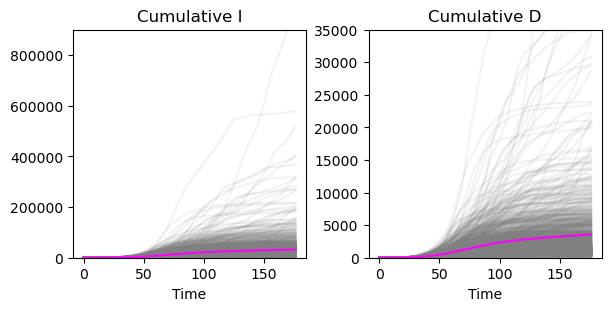

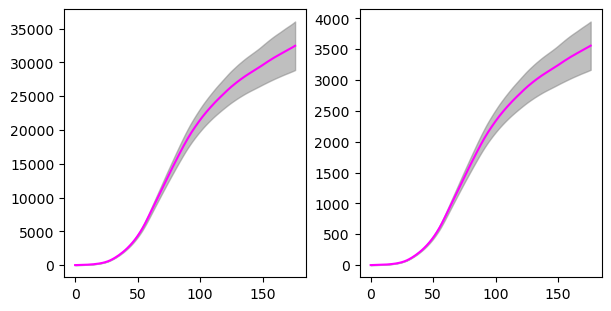

In [6]:
i_cumulative = np.cumsum(results_fig_1.data[:, results_fig_1.index('I'), :], axis=1).T
d_cumulative = results_fig_1.data[:, results_fig_1.index('D'), :].T

fig, axs = plt.subplots(1, 2, figsize=(6.0, 3.0), layout='compressed')
fig_stat, axs_stat = plt.subplots(1, 2, figsize=(6.0, 3.0), layout='compressed')
y_lims = (9E5, 3.5E4)

for i, lab_arr in enumerate([('I', i_cumulative), ('D', d_cumulative)]):
    lab, arr = lab_arr
    arr_mean = np.average(arr, axis=1)
    moe_cf = stats.t.ppf((1 + confidence) / 2., arr.shape[0] - 1)
    ci_inc = stats.sem(arr.T) * moe_cf

    axs[i].plot(results_fig_1.time, arr, alpha=0.1, color='gray')
    axs[i].plot(results_fig_1.time, arr_mean, color=colors_ode)
    axs[i].set_xlabel('Time')
    axs[i].set_title(f'Cumulative {lab}')
    axs[i].set_ylim(0, y_lims[i])

    axs_stat[i].fill_between(results_fig_1.time, arr_mean - ci_inc, arr_mean + ci_inc, alpha=0.5, color='gray')
    axs_stat[i].plot(results_fig_1.time, arr_mean, color=colors_ode)

Cannot reproduce Figure 8 since cannot reproduce Figure 1.

Quantify reproducibility of Figure 4.

Figure 4 EFECT Error (mean +- st. dev)
L: 3000.0
	Sample size 10: 1.3724379480128106 +- 0.08359480689646494
	Sample size 50: 0.628878478023107 +- 0.03908308037416661
	Sample size 100: 0.4398178221845944 +- 0.029079658094673104
	Sample size 500: 0.1965846983147153 +- 0.013163305431325911
	Sample size 1000: 0.13838761069446523 +- 0.00968041562375709
	Sample size 5000: 0.06251996248432054 +- 0.004858285622171125
	Sample size 10000: 0.044301445268613404 +- 0.0030671985267984284
L: 4000.0
	Sample size 10: 1.346663825924658 +- 0.07508616308396115
	Sample size 50: 0.6222562396719205 +- 0.040202479490261074
	Sample size 100: 0.43730438784119113 +- 0.0315006473682413
	Sample size 500: 0.1976328216581118 +- 0.013351994968716214
	Sample size 1000: 0.13901225550950091 +- 0.010019429532223616
	Sample size 5000: 0.06240125403796472 +- 0.0048116462567220275
	Sample size 10000: 0.04419616803979845 +- 0.003266425268808363
L: 5000.0
	Sample size 10: 1.3631669865533258 +- 0.08184937687429567
	Sample size

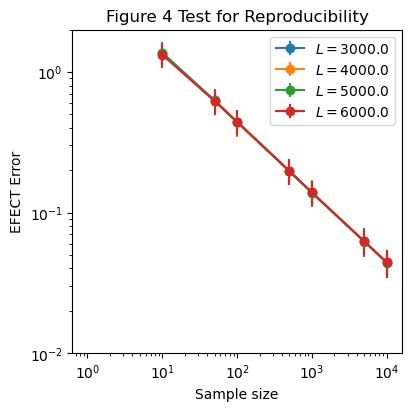

In [7]:
prefix_fig_4 = 'results_fig_4'

ssr_metadata_fig_4 = {}
ssr_results_fig_4 = {}

if load_ssr_data:
    md_data, res_data, iv_data, p_data, _ = sde.load_ssr_dataset(results_dir, prefix_fig_4)
    for i in range(len(md_data)):
        v = iv_data[i]['L']
        if v not in ssr_metadata_fig_4:
            ssr_metadata_fig_4[v] = {}
            ssr_results_fig_4[v] = {}
        ssr_metadata_fig_4[v][md_data[i].sample_size] = md_data[i]
        ssr_results_fig_4[v][md_data[i].sample_size] = res_data[i]

else:
    for i, v in tqdm(enumerate(init_pops_fig_4), total=len(init_pops_fig_4), leave=False):
        ssr_metadata_fig_4[v], ssr_results_fig_4[v] = sde.generate_ssr_dataset(
            model_fig_4,
            tested_sample_sizes,
            num_steps_fig_4,
            dt,
            initial_values_fig_4[v], 
            parameters_fig_4[v], 
            prefix_fig_4 + f'_{i}',
            results_dir=results_dir if store_ssr_data else None
        )

fig_ax = None
for v, md in ssr_metadata_fig_4.items():
    fig_ax = sde.plot_repro(md, fig_ax=fig_ax, plot_kwargs=dict(label=f'$L={v}$'))
fig_ax[1].set_title('Figure 4 Test for Reproducibility')
fig_ax[1].legend()

print('Figure 4 EFECT Error (mean +- st. dev)')
for v in ssr_metadata_fig_4.keys():
    print(f'L: {v}')
    for sz, md in ssr_metadata_fig_4[v].items():
        print(f'\tSample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Quantify reproducibility of Figure 6.

Figure 6 EFECT Error (mean +- st. dev)
sigma: 0.4
	Sample size 10: 1.345403279589517 +- 0.07710971283097069
	Sample size 50: 0.6208192244463416 +- 0.044876254995273424
	Sample size 100: 0.43921943946232533 +- 0.029098147594051514
	Sample size 500: 0.19812039641876505 +- 0.014543319614709244
	Sample size 1000: 0.14015870421649063 +- 0.009658881302216552
	Sample size 5000: 0.06245977719088404 +- 0.004445935481893796
	Sample size 10000: 0.04426884909743551 +- 0.003263681359601798
sigma: 0.01
	Sample size 10: 1.387335721545653 +- 0.06876850075558008
	Sample size 50: 0.6527622334853217 +- 0.039961407376279685
	Sample size 100: 0.4627240818090372 +- 0.02547440649430764
	Sample size 500: 0.20778970857973264 +- 0.013036496098870622
	Sample size 1000: 0.1461546651547633 +- 0.008474372808105523
	Sample size 5000: 0.06546488074609869 +- 0.00390934067175558
	Sample size 10000: 0.04651846605982772 +- 0.002995926539418703


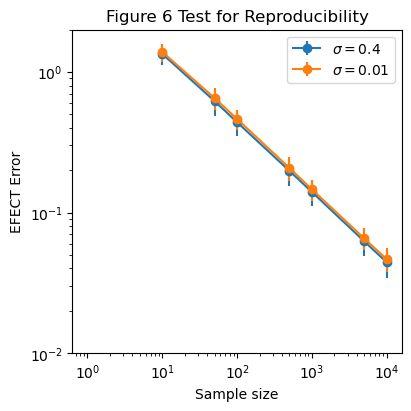

In [8]:
prefix_fig_6 = 'results_fig_6'

ssr_metadata_fig_6 = {}
ssr_results_fig_6 = {}

if load_ssr_data:
    md_data, res_data, iv_data, p_data, _ = sde.load_ssr_dataset(results_dir, prefix_fig_6)
    for i in range(len(md_data)):
        v = p_data[i]['sigma']
        if v not in ssr_metadata_fig_6:
            ssr_metadata_fig_6[v] = {}
            ssr_results_fig_6[v] = {}
        ssr_metadata_fig_6[v][md_data[i].sample_size] = md_data[i]
        ssr_results_fig_6[v][md_data[i].sample_size] = res_data[i]

else:
    for i, v in tqdm(enumerate(sigs_fig_6), total=len(sigs_fig_6), leave=False):
        ssr_metadata_fig_6[v], ssr_results_fig_6[v] = sde.generate_ssr_dataset(
            model_fig_6,
            tested_sample_sizes,
            num_steps_fig_6,
            dt,
            initial_values_fig_6[v], 
            parameters_fig_6[v], 
            prefix_fig_6 + f'_{i}',
            results_dir=results_dir if store_ssr_data else None
        )

fig_ax = None
for v, md in ssr_metadata_fig_6.items():
    fig_ax = sde.plot_repro(md, fig_ax=fig_ax, plot_kwargs=dict(label=f'$\\sigma={v}$'))
fig_ax[1].set_title('Figure 6 Test for Reproducibility')
fig_ax[1].legend()

print('Figure 6 EFECT Error (mean +- st. dev)')
for v in ssr_metadata_fig_6.keys():
    print(f'sigma: {v}')
    for sz, md in ssr_metadata_fig_6[v].items():
        print(f'\tSample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Show reproducibile results for Figure 4.

  0%|          | 0/4 [00:00<?, ?it/s]

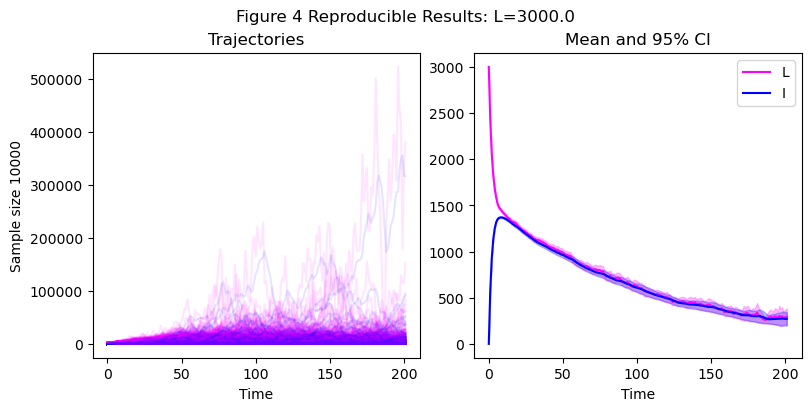

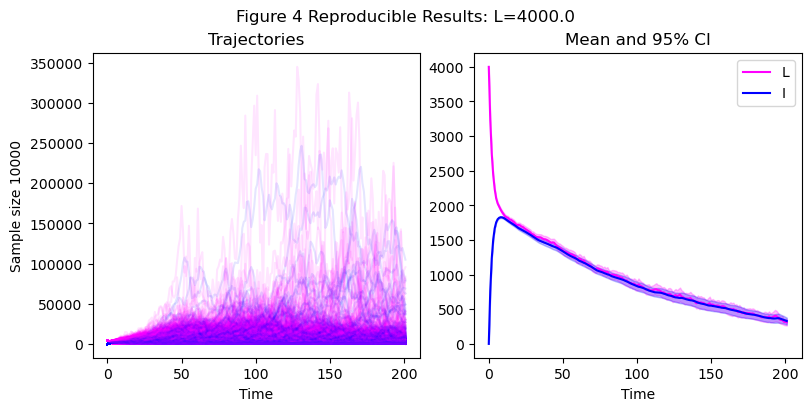

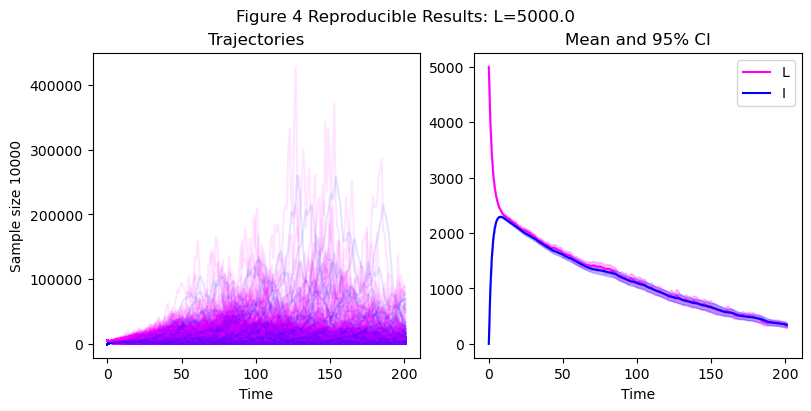

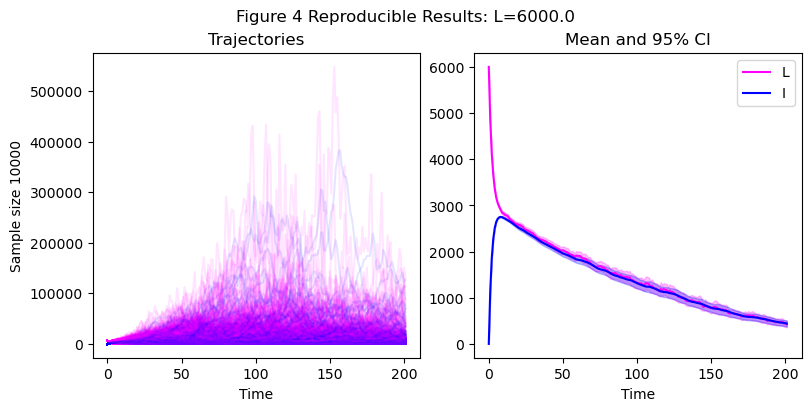

In [9]:
plot_colors_fig_4 = {
    'L': 'magenta',
    'I': 'blue'
}

for pop in tqdm(ssr_metadata_fig_4.keys(), leave=False):

    fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

    ssr_results_fig_4_sz = max(ssr_results_fig_4[pop].keys())

    r: sde.SDEResultSample = ssr_results_fig_4[pop][ssr_results_fig_4_sz].extract('L', 'I')
    r.plot(fig_axs=(fig, [axs[0]] * len(r.var_names)),
        plot_all_kwargs=dict(alpha=0.1),
        plot_kwargs={n: dict(color=plot_colors_fig_4[n]) for n in r.var_names})

    r.plot_ci(confidence, fig_axs=(fig, [axs[1]] * len(r.var_names)),
                plot_all_kwargs=dict(alpha=0.25),
                plot_kwargs={n: dict(color=plot_colors_fig_4[n]) for n in r.var_names})
    r.plot_mean(fig_axs=(fig, [axs[1]] * len(r.var_names)),
                plot_kwargs={n: dict(color=plot_colors_fig_4[n], label=n) 
                            for n in r.var_names})

    fig.suptitle(f'Figure 4 Reproducible Results: L={pop}')
    axs[0].set_title('Trajectories')
    axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
    axs[0].set_ylabel(f'Sample size {ssr_results_fig_4_sz}')
    _ = axs[1].legend()

Show reproducibile results for Figure 6.

  0%|          | 0/2 [00:00<?, ?it/s]

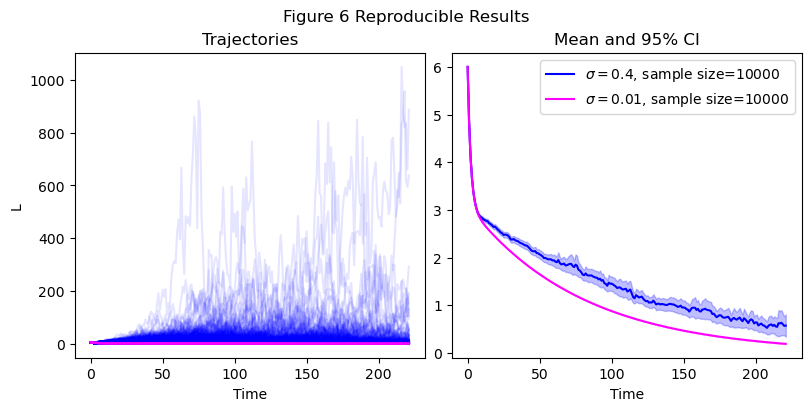

In [10]:
plot_colors_fig_6 = ['blue', 'magenta']
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

for i, sig in tqdm(enumerate(ssr_results_fig_6.keys()), total=len(ssr_results_fig_6.keys()), leave=False):

       ssr_results_fig_6_sz = max(ssr_results_fig_6[sig].keys())

       r: sde.SDEResultSample = ssr_results_fig_6[sig][ssr_results_fig_6_sz].extract('L')
       r.plot(fig_axs=(fig, [axs[0]] * len(r.var_names)),
              plot_all_kwargs=dict(alpha=0.1),
              plot_kwargs={n: dict(color=plot_colors_fig_6[i % len(plot_colors_fig_6)]) 
                           for n in r.var_names})

       r.plot_ci(confidence, fig_axs=(fig, [axs[1]] * len(r.var_names)),
              plot_all_kwargs=dict(alpha=0.25),
              plot_kwargs={n: dict(color=plot_colors_fig_6[i % len(plot_colors_fig_6)]) 
                           for n in r.var_names})
       r.plot_mean(fig_axs=(fig, [axs[1]] * len(r.var_names)),
                   plot_kwargs={n: dict(color=plot_colors_fig_6[i % len(plot_colors_fig_6)], 
                                        label=f'$\\sigma={sig}$, sample size={ssr_results_fig_6_sz}') 
                                        for n in r.var_names})

fig.suptitle('Figure 6 Reproducible Results')
axs[0].set_title('Trajectories')
axs[0].set_ylabel('L')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
_ = axs[1].legend()